In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading the downloaded dataset
df = pd.read_csv(r"E:\Techmiya_Machine_Learning_Project\Phishing Detection\urldata.csv")
df.head(10)

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
5,5,https://www.reddit.com,benign,0
6,6,https://www.yahoo.com,benign,0
7,7,https://www.google.co.in,benign,0
8,8,https://www.qq.com,benign,0
9,9,https://www.amazon.com,benign,0


In [8]:
#Removing the unnamed columns as it is not necesary.
df = df.drop('Unnamed: 0',axis=1)
df.head(10)

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0
5,https://www.reddit.com,benign,0
6,https://www.yahoo.com,benign,0
7,https://www.google.co.in,benign,0
8,https://www.qq.com,benign,0
9,https://www.amazon.com,benign,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [10]:
df.shape

(450176, 3)

In [11]:
# Printing number of legit and fraud domain urls
df["label"].value_counts()

label
benign       345738
malicious    104438
Name: count, dtype: int64

In [12]:
#Importing dependencies
from urllib.parse import urlparse
import os.path

# changing dataframe variable
urldata = df

In [14]:
#Length of URL (Phishers can use long URL to hide the doubtful part in the address bar)
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

ValueError: '.' does not appear to be an IPv4 or IPv6 address

In [16]:
def get_url_length(url):
    try:
        return len(str(url)) if isinstance(url, str) else 0
    except Exception:
        return 0

def get_hostname_length(url):
    try:
        parsed_url = urlparse(url)
        return len(parsed_url.netloc) if parsed_url.netloc else 0
    except Exception:
        return 0

def get_path_length(url):
    try:
        parsed_url = urlparse(url)
        return len(parsed_url.path) if parsed_url.path else 0
    except Exception:
        return 0

# Apply the functions to calculate lengths
urldata['url_length'] = urldata['url'].apply(get_url_length)
urldata['hostname_length'] = urldata['url'].apply(get_hostname_length)
urldata['path_length'] = urldata['url'].apply(get_path_length)

# Check the updated dataframe
urldata.head()


,url,label,result,url_length,hostname_length,path_length
0,https://www.google.com,benign,0,22,14,0
1,https://www.youtube.com,benign,0,23,15,0
2,https://www.facebook.com,benign,0,24,16,0
3,https://www.baidu.com,benign,0,21,13,0
4,https://www.wikipedia.org,benign,0,25,17,0


In [18]:
# First Directory Length
def fd_length(url):
    try:
        # Extract the path from the URL
        urlpath = urlparse(url).path
        
        # Split the path and check if it contains at least one directory
        if len(urlpath.split('/')) > 1:
            return len(urlpath.split('/')[1])
        else:
            return 0
    except Exception:
        return 0

# Apply the function to calculate first directory length
urldata['fd_length'] = urldata['url'].apply(fd_length)

# Check the updated dataframe
urldata.head()


,url,label,result,url_length,hostname_length,path_length,fd_length
0,https://www.google.com,benign,0,22,14,0,0
1,https://www.youtube.com,benign,0,23,15,0,0
2,https://www.facebook.com,benign,0,24,16,0,0
3,https://www.baidu.com,benign,0,21,13,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,0


Count Features
The following features will be extracted from the URL for classification.

Count Of '-'
Count Of '@'
Count Of '?'
Count Of '%'
Count Of '.'
Count Of '='
Count Of 'http'
Count Of 'www'
Count Of Digits
Count Of Letters
Count Of Number Of Directories

In [19]:


# Count of how many times a special character appearsin url

urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [20]:

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [21]:

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [23]:
# Number of Directories
def no_of_dir(url):
    try:
        # Extract the path from the URL
        urldir = urlparse(url).path
        
        # Count the number of '/' in the path
        return urldir.count('/')
    except Exception:
        return 0

# Apply the function to calculate the number of directories
urldata['count_dir'] = urldata['url'].apply(no_of_dir)

# Check the updated dataframe
urldata.head()


,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0


## Binary Classification

In [24]:

import re

#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.'
        '([01]?\d\d?|2[0-4]\d|25[0-5])\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\.'
C:\Users\joelf\AppData\Local\Temp\ipykernel_10140\4007069592.py:6: SyntaxWarning: invalid escape sequence '\d'
  '(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.'
C:\Users\joelf\AppData\Local\Temp\ipykernel_10140\4007069592.py:7: SyntaxWarning: invalid escape sequence '\d'
  '([01]?\d\d?|2[0-4]\d|25[0-5])\/)|'  # IPv4
C:\Users\joelf\AppData\Local\Temp\ipykernel_10140\4007069592.py:8: SyntaxWarning: invalid escape sequence '\.'
  '((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)' # IPv4 in hexadecimal


In [25]:
# use of url shortening service
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
C:\Users\joelf\AppData\Local\Temp\ipykernel_10140\1938037723.py:3: SyntaxWarning: invalid escape sequence '\.'
  match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr

In [26]:

# printing first few rows
urldata.head(10)

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1
5,https://www.reddit.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,-1
6,https://www.yahoo.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
7,https://www.google.co.in,benign,0,24,16,0,0,0,0,0,...,3,0,1,1,1,0,18,0,1,1
8,https://www.qq.com,benign,0,18,10,0,0,0,0,0,...,2,0,1,1,1,0,13,0,1,1
9,https://www.amazon.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1


In [27]:


# printing info about current dataset
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              450176 non-null  object
 1   label            450176 non-null  object
 2   result           450176 non-null  int64 
 3   url_length       450176 non-null  int64 
 4   hostname_length  450176 non-null  int64 
 5   path_length      450176 non-null  int64 
 6   fd_length        450176 non-null  int64 
 7   count-           450176 non-null  int64 
 8   count@           450176 non-null  int64 
 9   count?           450176 non-null  int64 
 10  count%           450176 non-null  int64 
 11  count.           450176 non-null  int64 
 12  count=           450176 non-null  int64 
 13  count-http       450176 non-null  int64 
 14  count-https      450176 non-null  int64 
 15  count-www        450176 non-null  int64 
 16  count-digits     450176 non-null  int64 
 17  count-lett

In [28]:
urldata.to_csv("Url_Processed.csv")

In [29]:
# loading out dataset from previous notebook
urldata = pd.read_csv(r"Url_Processed.csv")

# droping "Unnamed: 0" as its unncessary feature
urldata.drop("Unnamed: 0",axis=1,inplace=True)

urldata.head(10)

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1
5,https://www.reddit.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,-1
6,https://www.yahoo.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
7,https://www.google.co.in,benign,0,24,16,0,0,0,0,0,...,3,0,1,1,1,0,18,0,1,1
8,https://www.qq.com,benign,0,18,10,0,0,0,0,0,...,2,0,1,1,1,0,13,0,1,1
9,https://www.amazon.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1


In [30]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              450176 non-null  object
 1   label            450176 non-null  object
 2   result           450176 non-null  int64 
 3   url_length       450176 non-null  int64 
 4   hostname_length  450176 non-null  int64 
 5   path_length      450176 non-null  int64 
 6   fd_length        450176 non-null  int64 
 7   count-           450176 non-null  int64 
 8   count@           450176 non-null  int64 
 9   count?           450176 non-null  int64 
 10  count%           450176 non-null  int64 
 11  count.           450176 non-null  int64 
 12  count=           450176 non-null  int64 
 13  count-http       450176 non-null  int64 
 14  count-https      450176 non-null  int64 
 15  count-www        450176 non-null  int64 
 16  count-digits     450176 non-null  int64 
 17  count-lett

label
benign       345738
malicious    104438
Name: count, dtype: int64


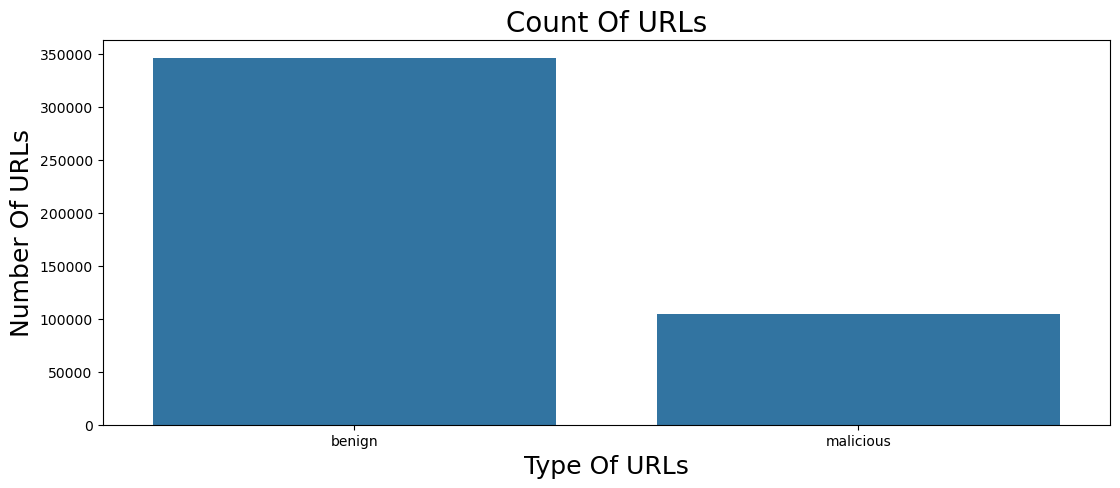

In [31]:

# Lets find how many malicious and non-malicious samples we have
i = urldata["label"].value_counts()
print(i)

plt.figure(figsize=(13,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.show()

In [32]:


#Correlation Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

ValueError: could not convert string to float: 'https://www.google.com'

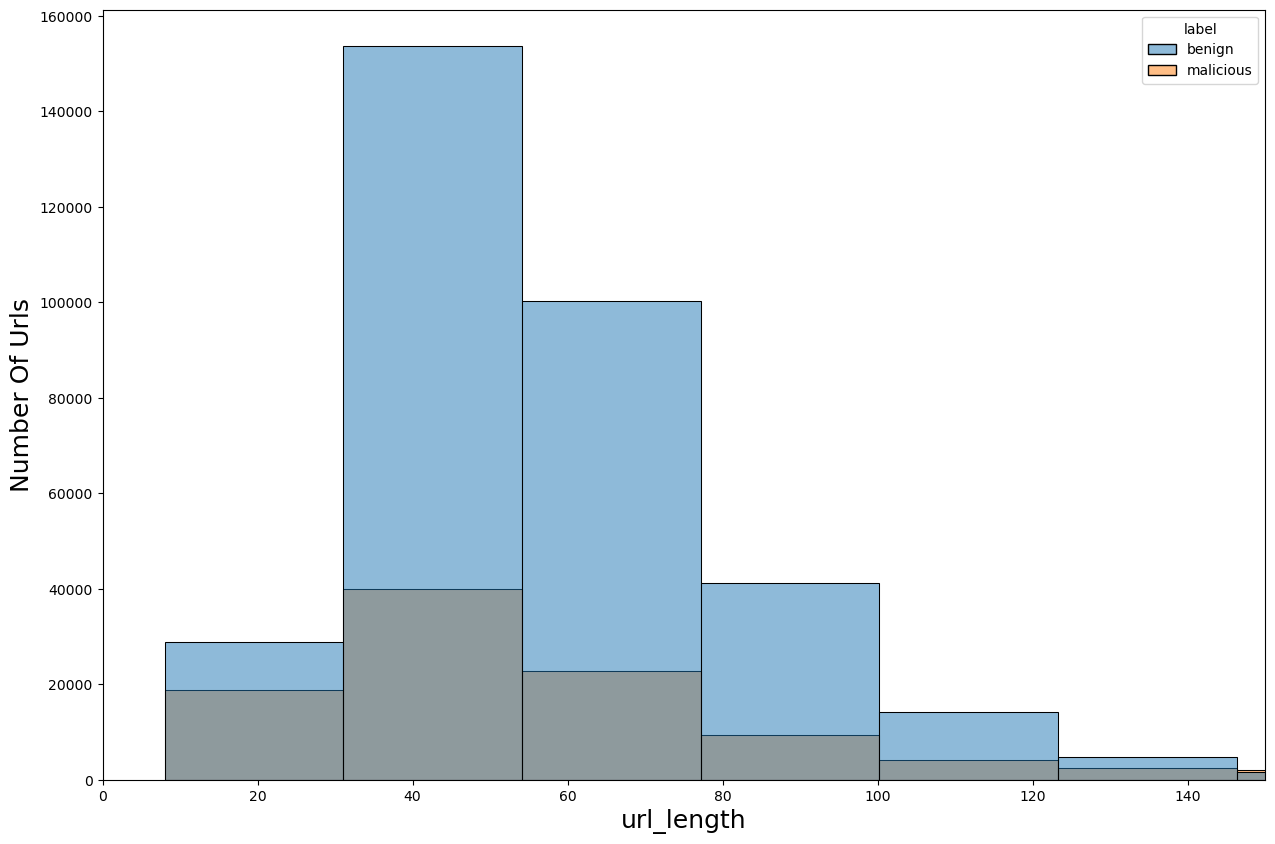

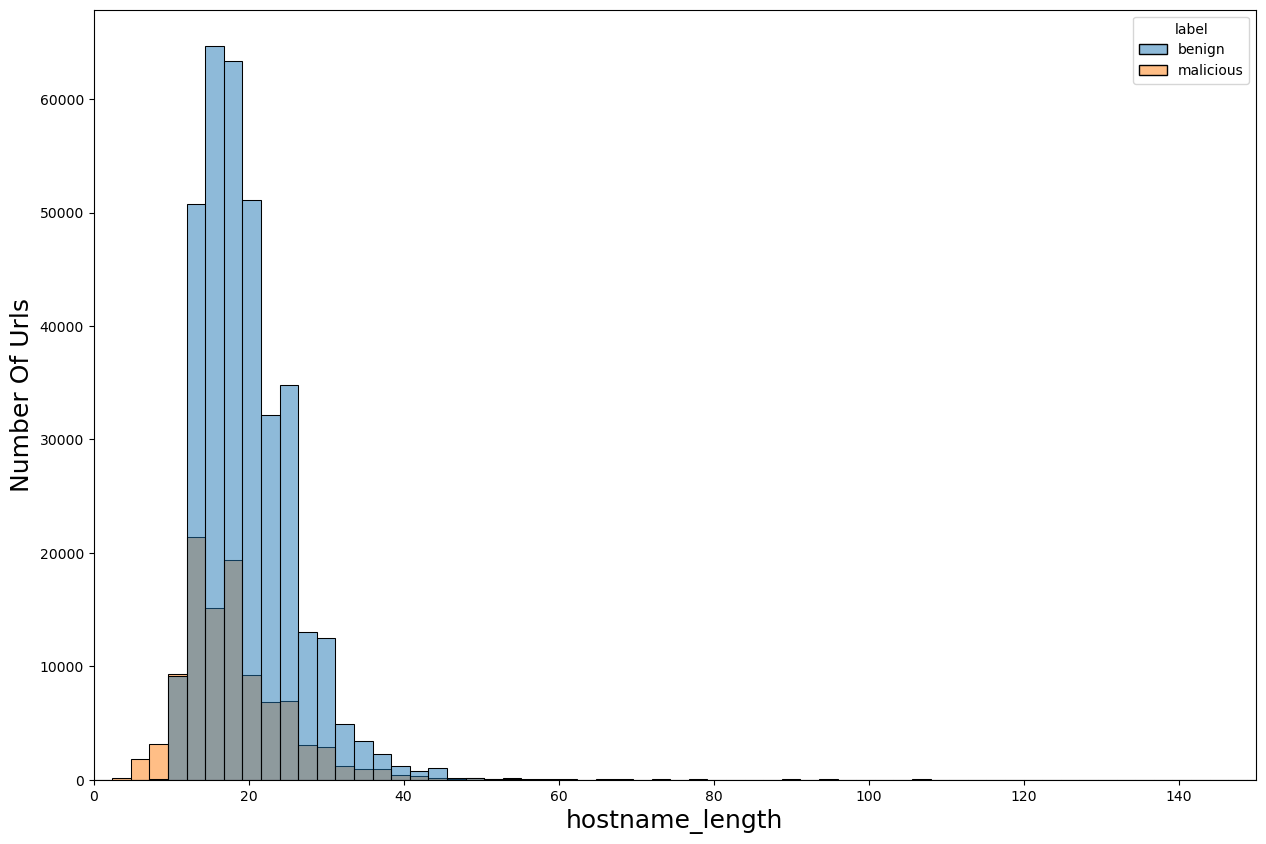

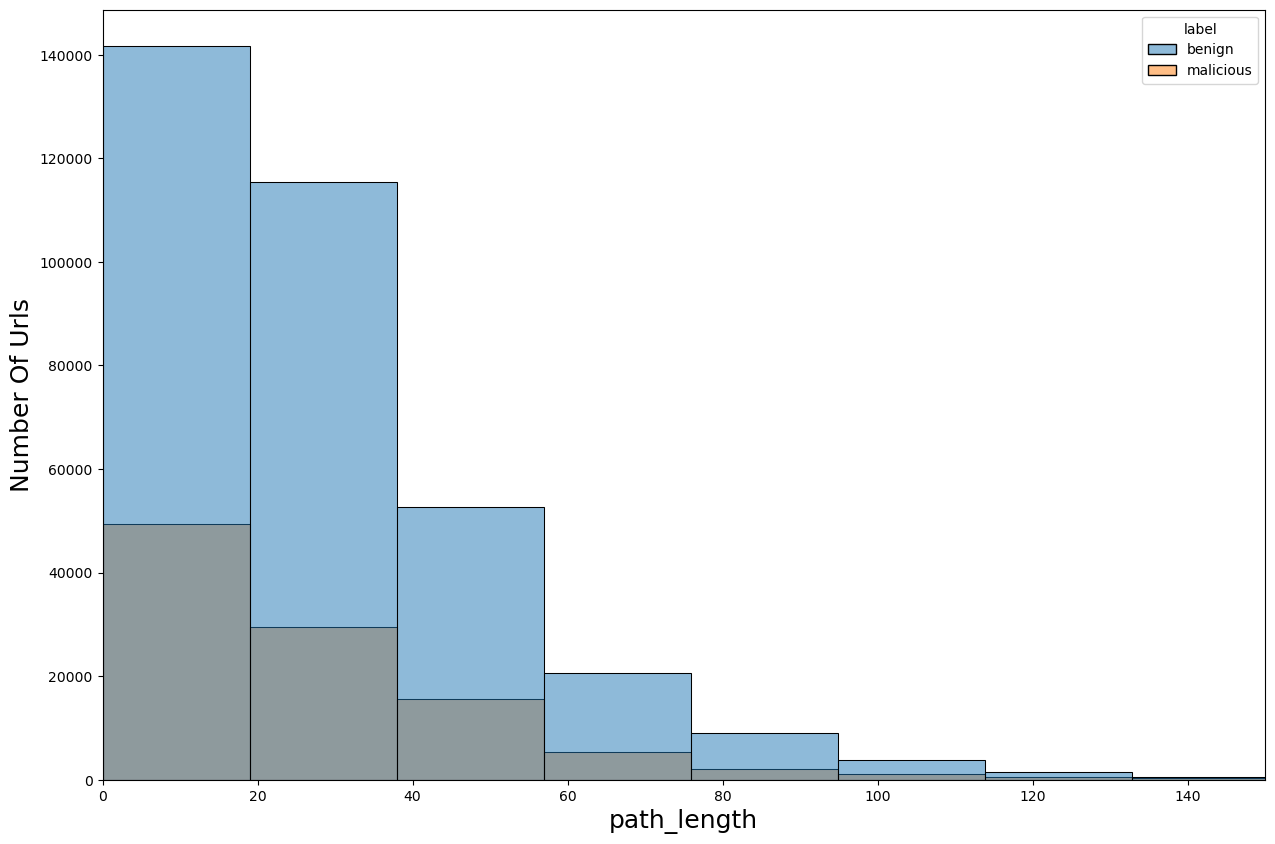

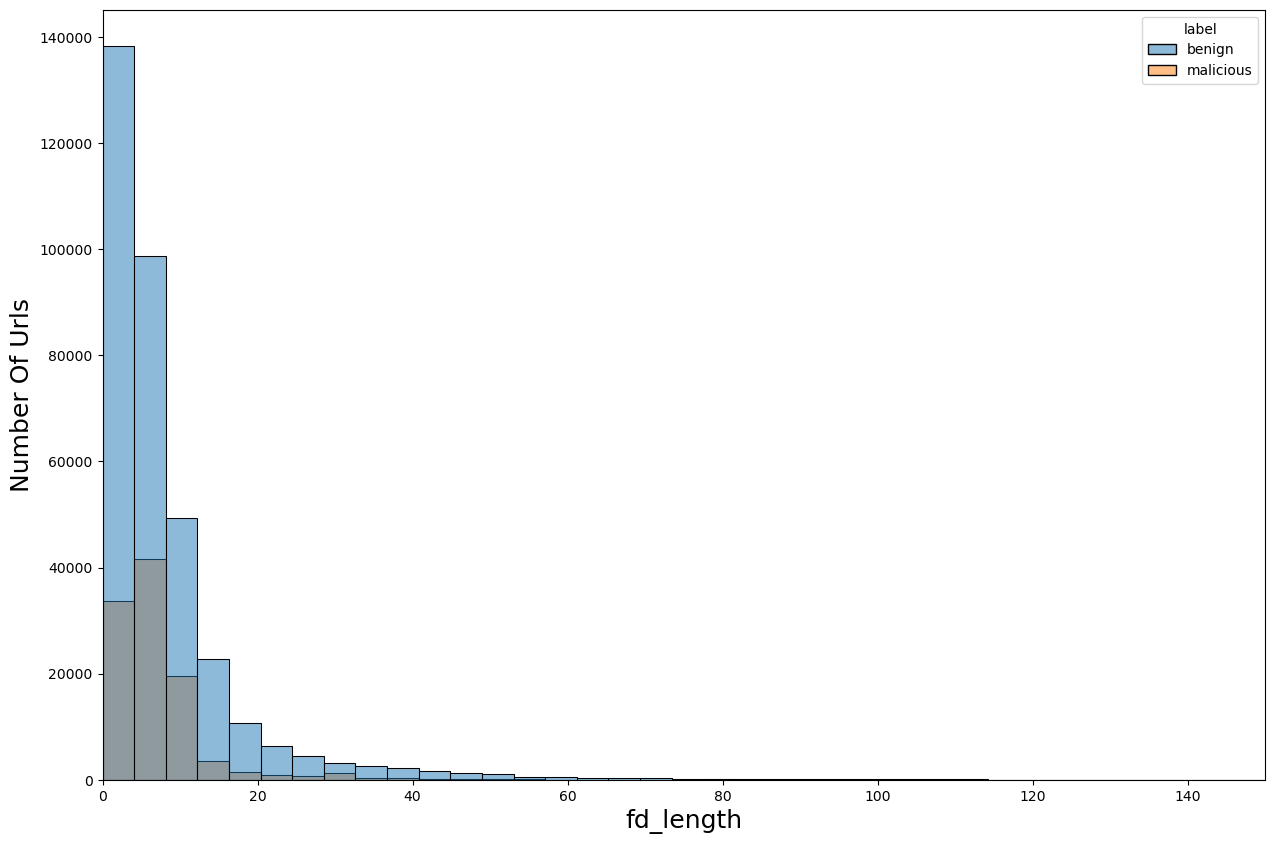

In [33]:
# setting plot sizes
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10

# plotting distrubutions
features = list(urldata.columns) # list of feature names
features.remove("url")
features.remove("result")

hist_features = ["url_length","hostname_length","path_length","fd_length"]

for i in hist_features:
   sns.histplot(data=urldata,x=i,bins=100,hue='label')
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.xlim(0,150)
   plt.show()

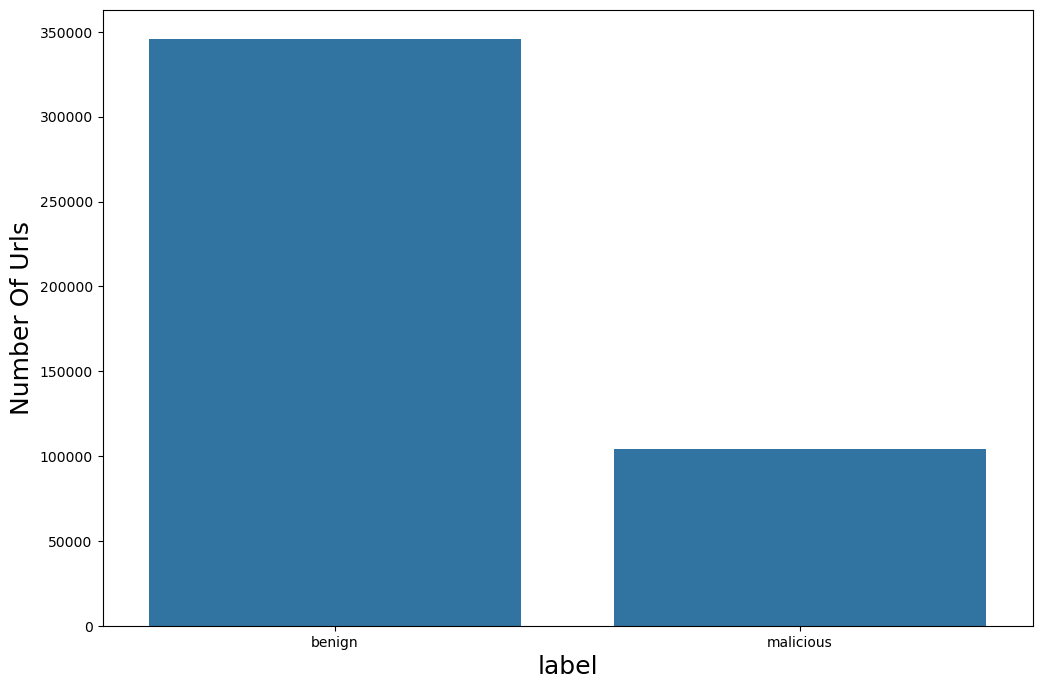

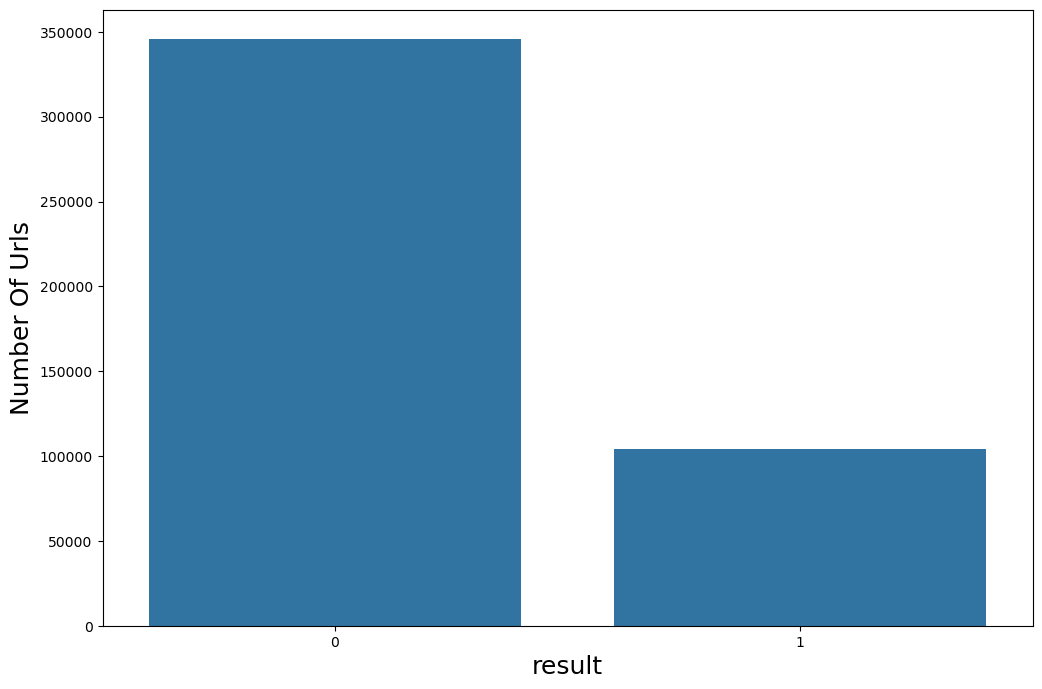

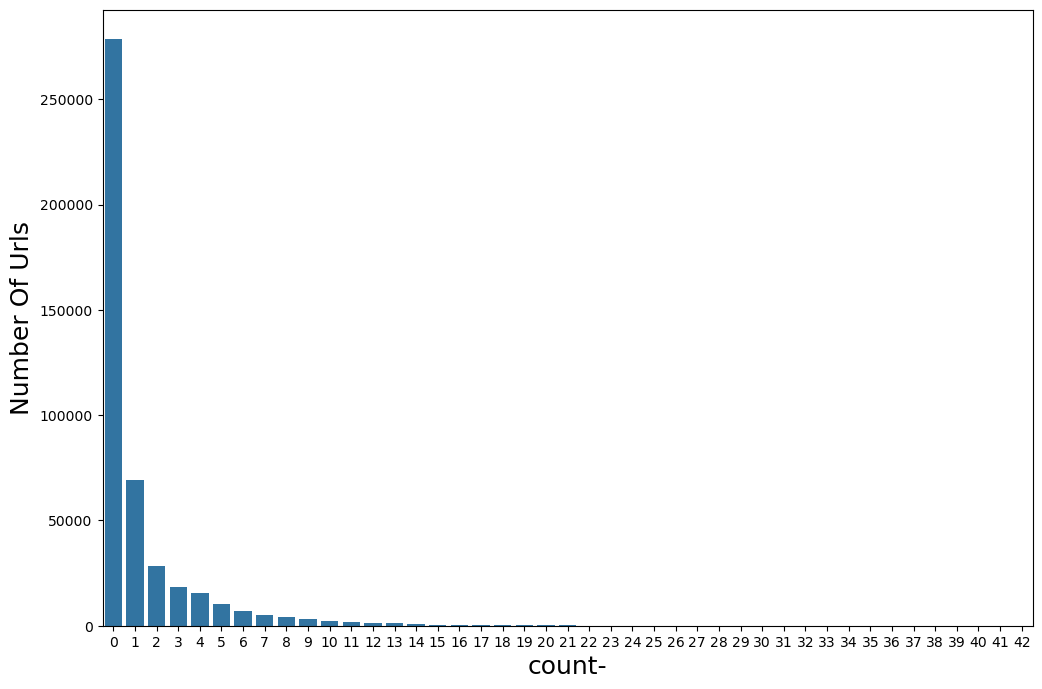

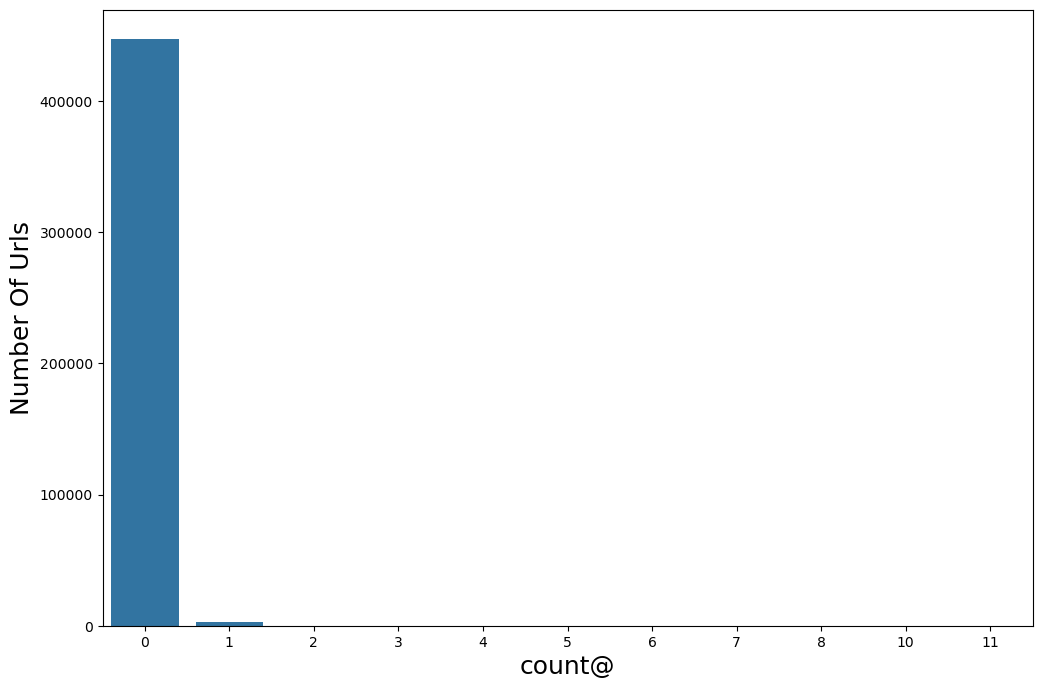

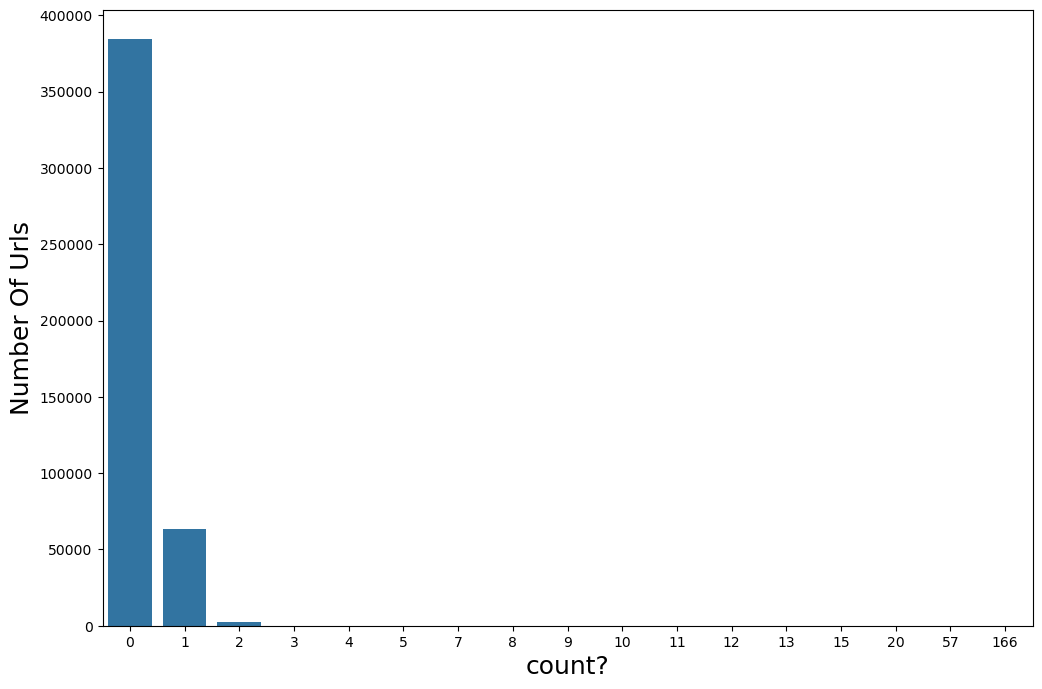

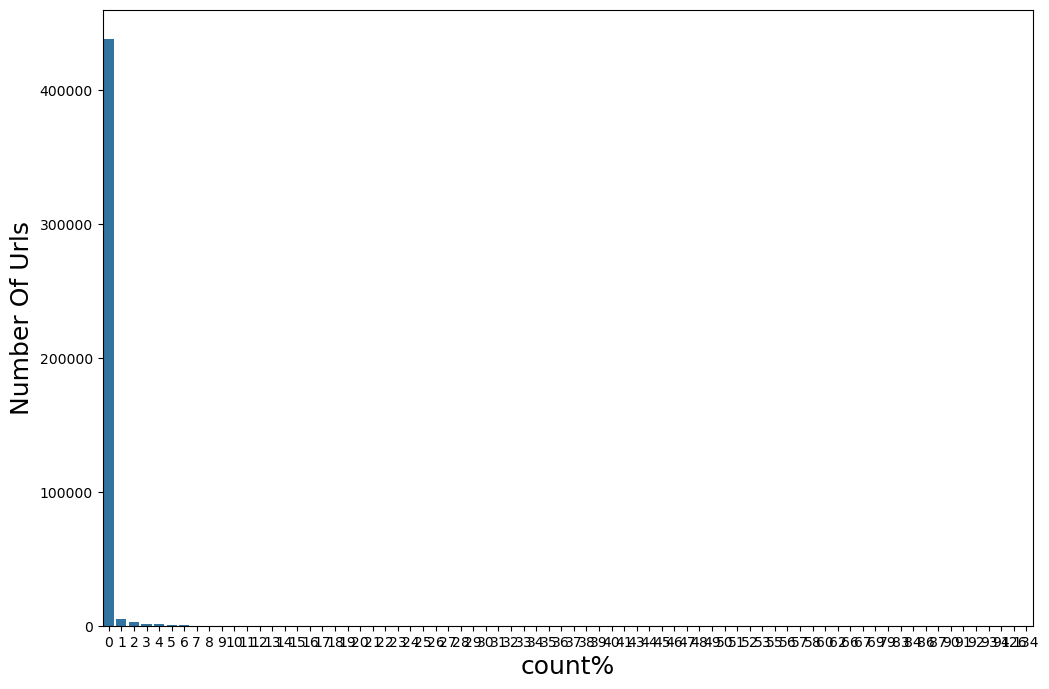

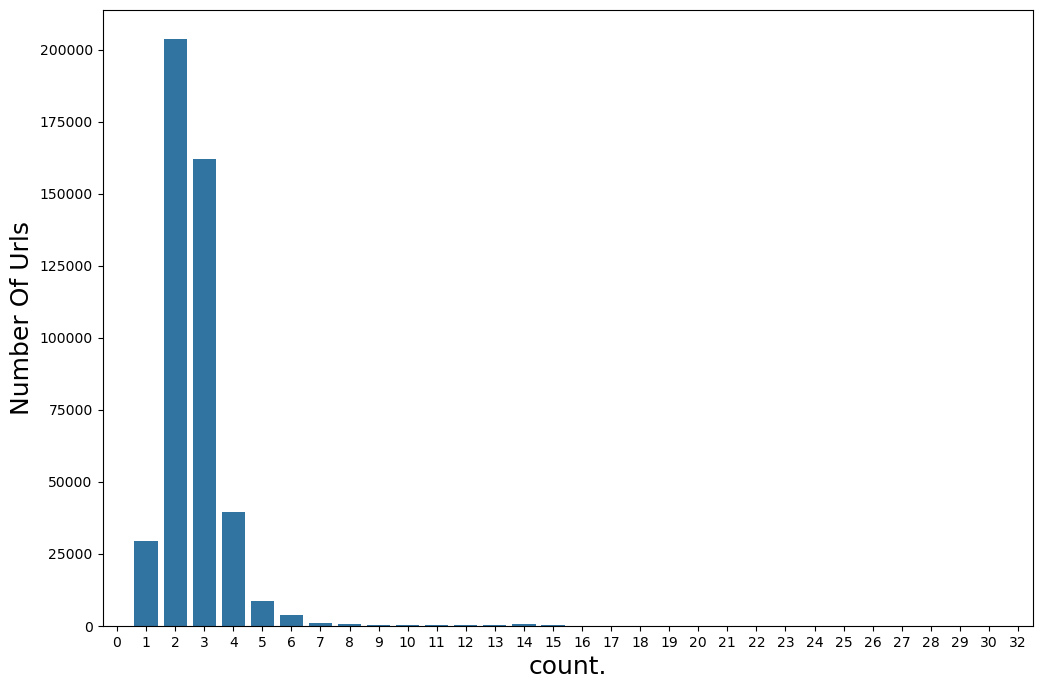

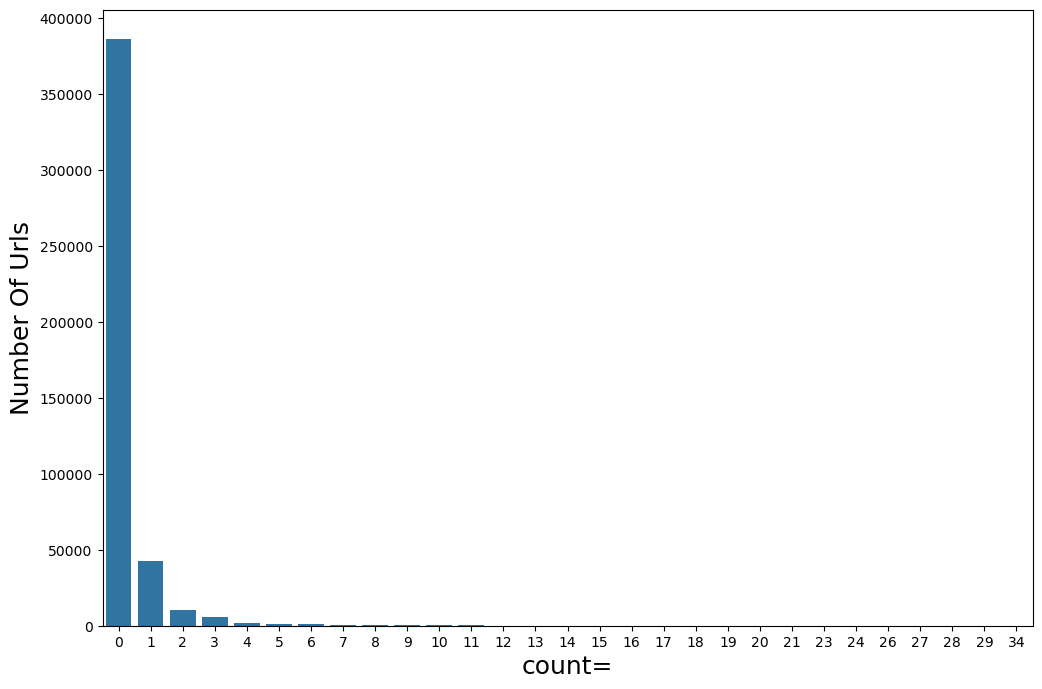

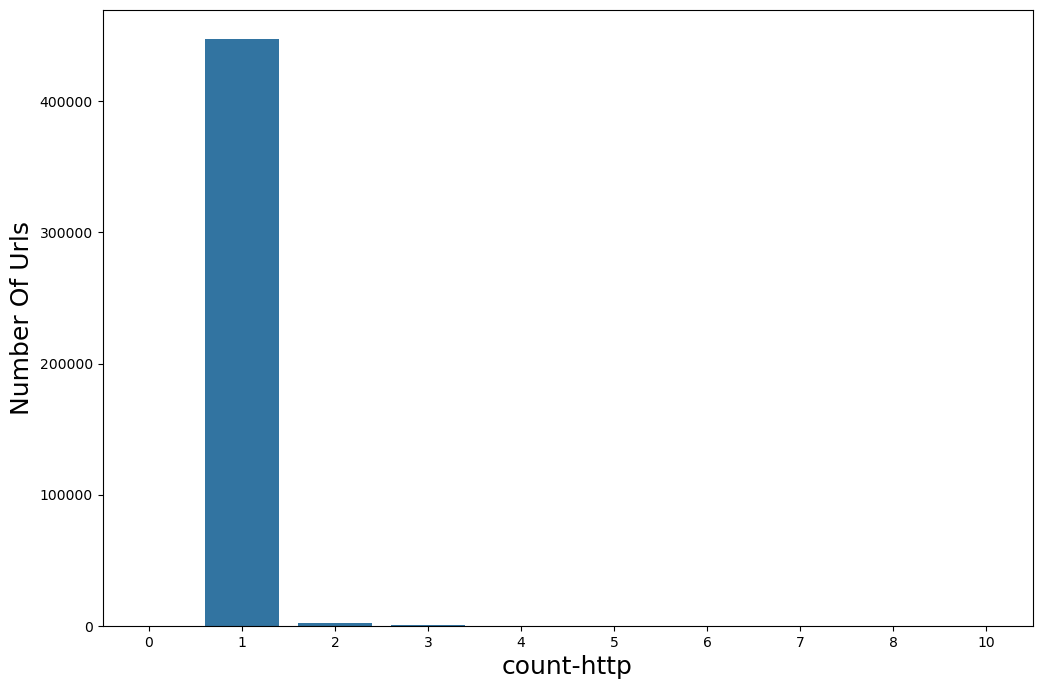

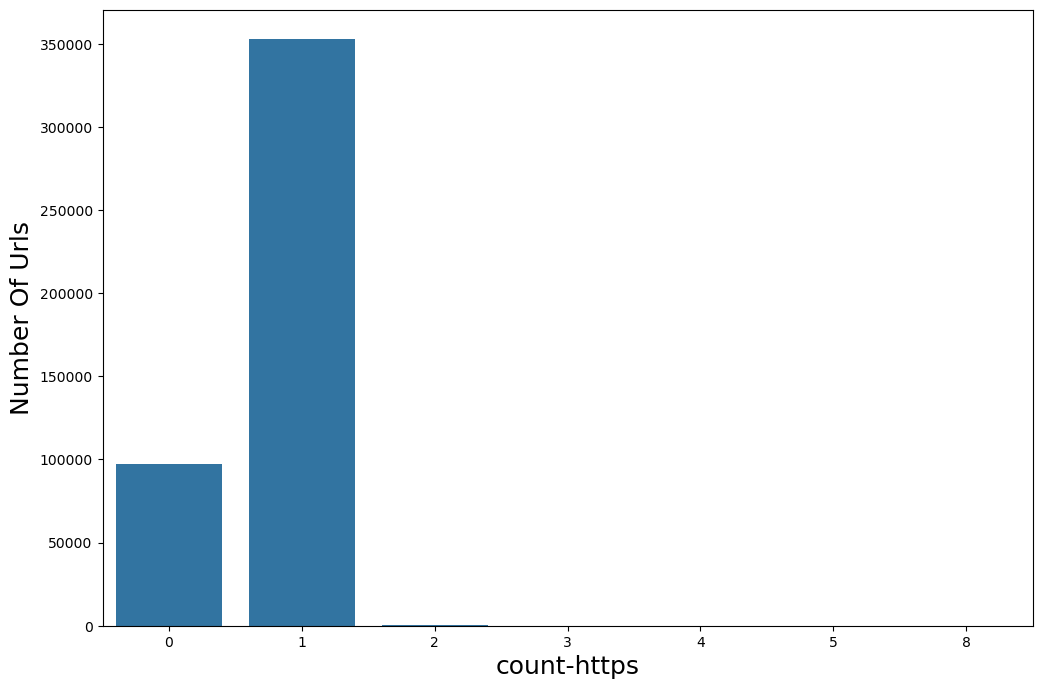

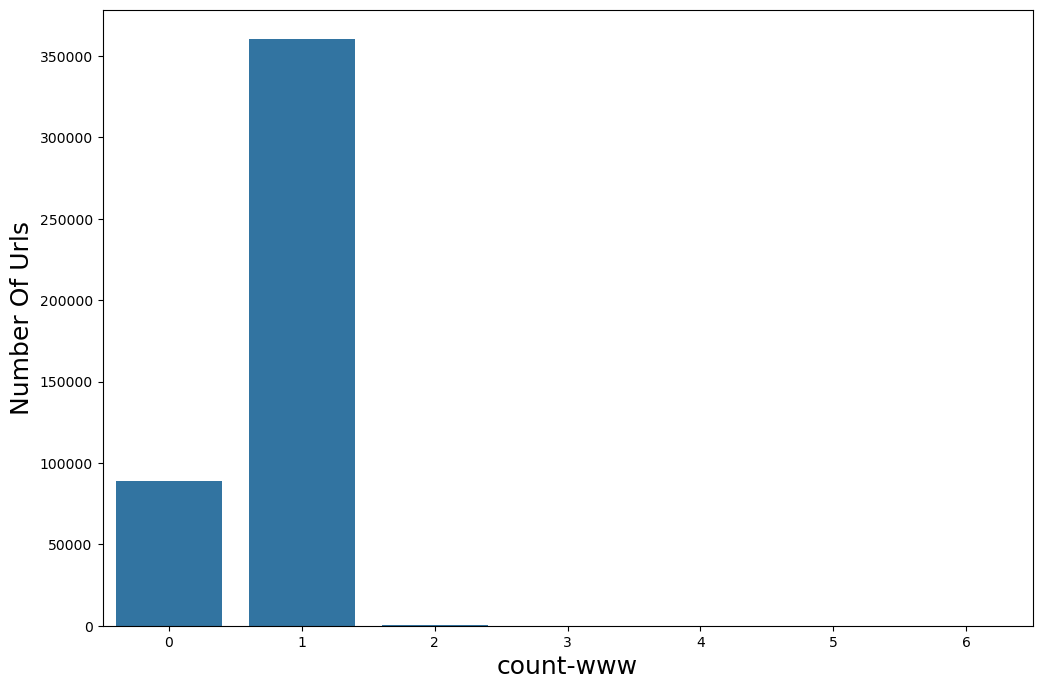

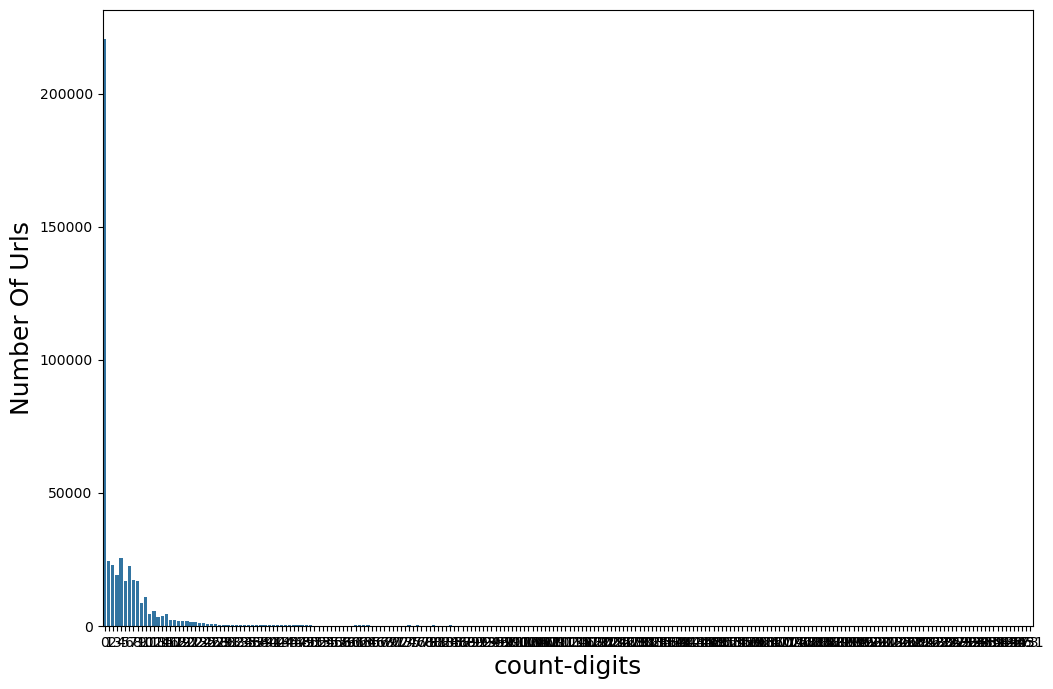

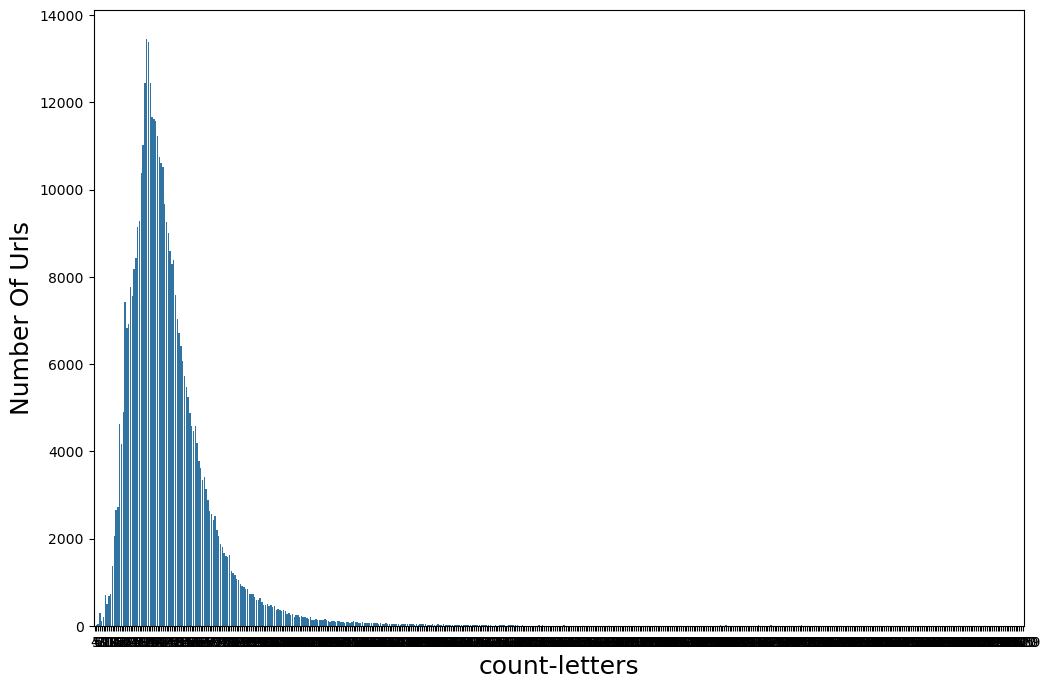

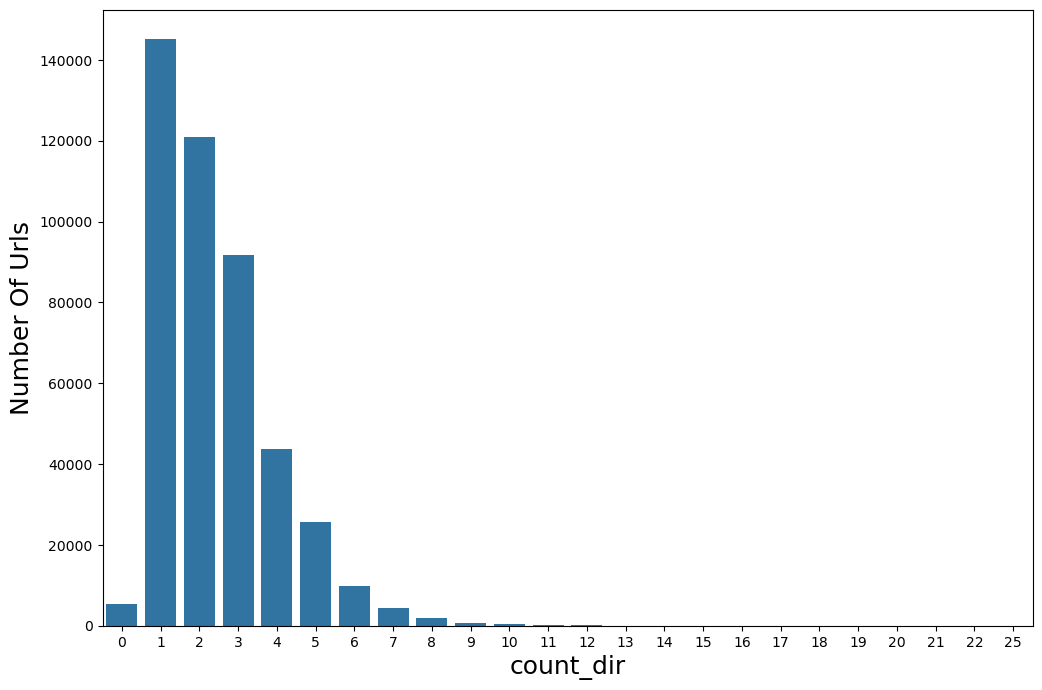

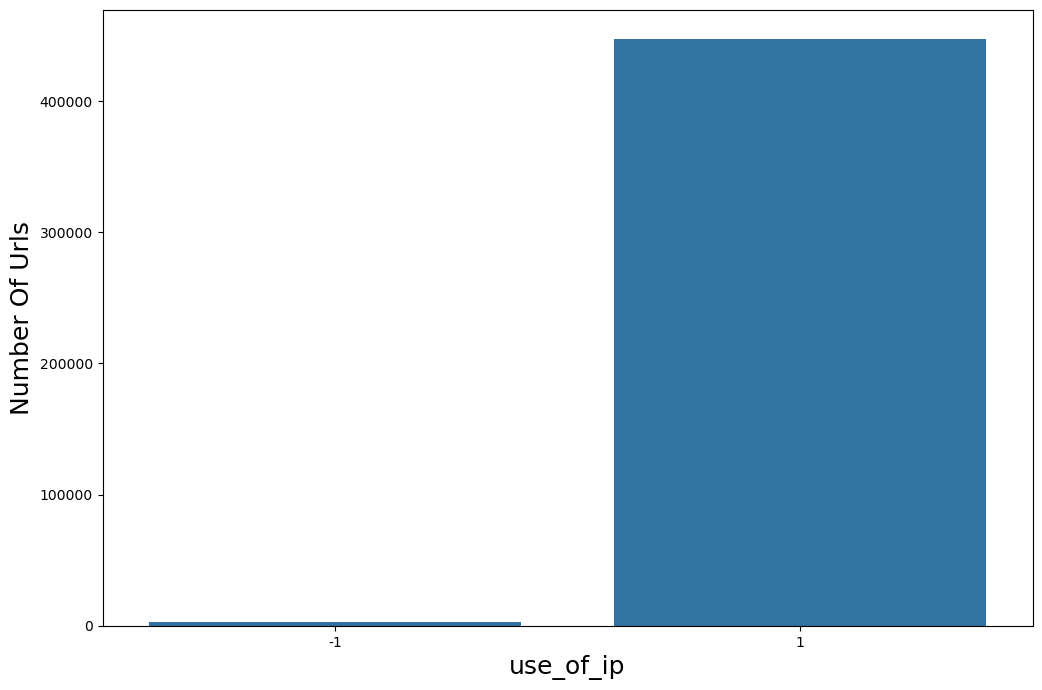

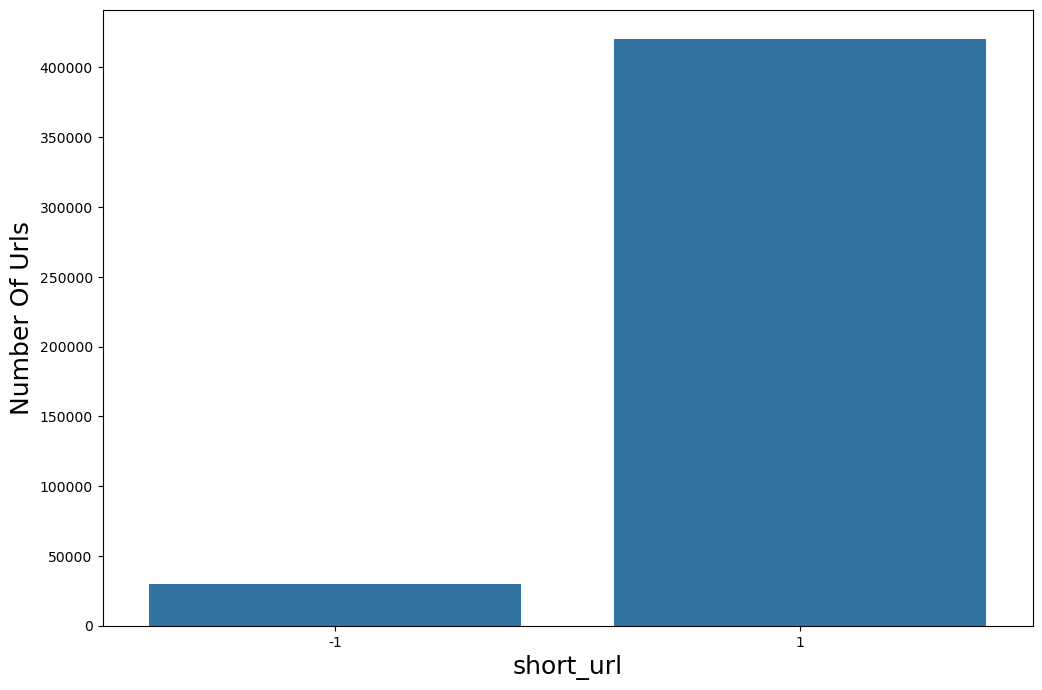

In [34]:

# plotting distrubutions

features = list(urldata.columns) # list of feature names
features.remove("url")

rcParams['figure.figsize'] = 12,8

for i in features:
   
   if i in hist_features:
     continue
   
   sns.countplot(x=i,data=urldata)
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.show()

## Model Training
Before training our models we'll split the data into train and test dataset. We'll train multiple models and choose the one which gives us the best validation-accuracy. This problem falls under "Binary classification" and some of the models we'll train are :

* Decision Tree
* Random Forest
* Multilayer Perceptron (deep learning)

In [35]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1


In [36]:

# remove uneccessary columns
urldata.drop(["url","label"],axis=1,inplace=True)

urldata.head()

,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,1
1,0,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1,1
2,0,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1,1
3,0,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1,1
4,0,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1,1


In [37]:

# NOTE : We'll use only lexical features for this notebook i,e not taking 'url_length' and 'short_url'

#Independent Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = urldata['result']

In [38]:
# printing x
x.head()

,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
0,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1
1,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1
2,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1
3,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1
4,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1


In [39]:

# printing y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [41]:

from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming 'x' and 'y' are defined
smote = SMOTE()

# Use fit_resample instead of fit_sample
x_sample, y_sample = smote.fit_resample(x, y.values.ravel())

# Convert the results to DataFrame if needed
x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)
